In [548]:
import pandas as pd
import numpy as np

In [433]:
data = pd.read_csv("intensity_data_thilak.tsv", delimiter="\t")

In [434]:
data.head()

,intensity,day_of_week,month,day,hour,minute
0,0.640219,4,3,9,17,24
1,0.664680,4,3,9,17,26
2,0.664683,4,3,9,17,28
3,0.645341,4,3,9,17,30
4,0.656002,4,3,9,17,32


In [435]:
import matplotlib.pyplot as plt
import numpy as np

In [436]:
def get_point_wise_intensities(hour_wise, day, hour, intensity_dict):
    for point in [0, 15, 30, 45]:
        try:
            point_wise = hour_wise.loc[hour_wise["minute"] == point]
            intensity_dict[day][hour][point] = np.average(point_wise['intensity'])
        except:
            pass
#         intensity_dict[day][hour][point] = hour_wise.loc[hour_wise["minute"] == point]
    
#     print(intensity_dict)

In [437]:
def get_hour_wise_intensities(day_wise, day, intensity_dict):
    for hour in range(8,22):
        intensity_dict[day][hour] = {}
        hour_wise = day_wise.loc[day_wise["hour"] == hour]
        get_point_wise_intensities(hour_wise, day, hour, intensity_dict)

In [438]:
def get_day_wise_intensities(data, intensity_dict):
    for day in range(7):
        intensity_dict[day] = {}
        day_wise = data.loc[data["day_of_week"] == day]
        get_hour_wise_intensities(day_wise, day, intensity_dict)

In [530]:
# fw = open("day_wise_intensities_thilak.tsv", "w")
# intensity_dict = {}
# get_day_wise_intensities(data, intensity_dict)
# for day in intensity_dict:
#     time = ""
#     day_wise_intensities = ""
#     for hour in intensity_dict[day]:
#         for minute in intensity_dict[day][hour]:
# #                 time += str(hour)+"_"+str(minute)+"\t"
#             day_wise_intensities += str(intensity_dict[day][hour][minute])+"\t"
# #     print(day_wise_intensities)
#     fw.write(day_wise_intensities.strip()+"\n")
# fw.close()

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [532]:
import matplotlib.pyplot as plt
%matplotlib inline

In [542]:
plot_data = open("day_wise_intensities_thilak.tsv").readlines()
for line in plot_data:
    print(len(line.split("\t")))

52
52
52
52
52
52
52
52


In [543]:
X = plot_data[0]
X = [float(x) for x in X.split("\t")]
Y1 = plot_data[1]
Y1 = [float(y) for y in Y1.split("\t")]
Y2 = plot_data[2]
Y2 = [float(y) for y in Y2.split("\t")]
Y3 = plot_data[3]
Y3 = [float(y) for y in Y3.split("\t")]
Y4 = plot_data[4]
Y4 = [float(y) for y in Y4.split("\t")]
Y5 = plot_data[5]
Y5 = [float(y) for y in Y5.split("\t")]
Y6 = plot_data[6]
Y6 = [float(y) for y in Y6.split("\t")]
Y7 = plot_data[7]
Y7 = [float(y) for y in Y7.split("\t")]

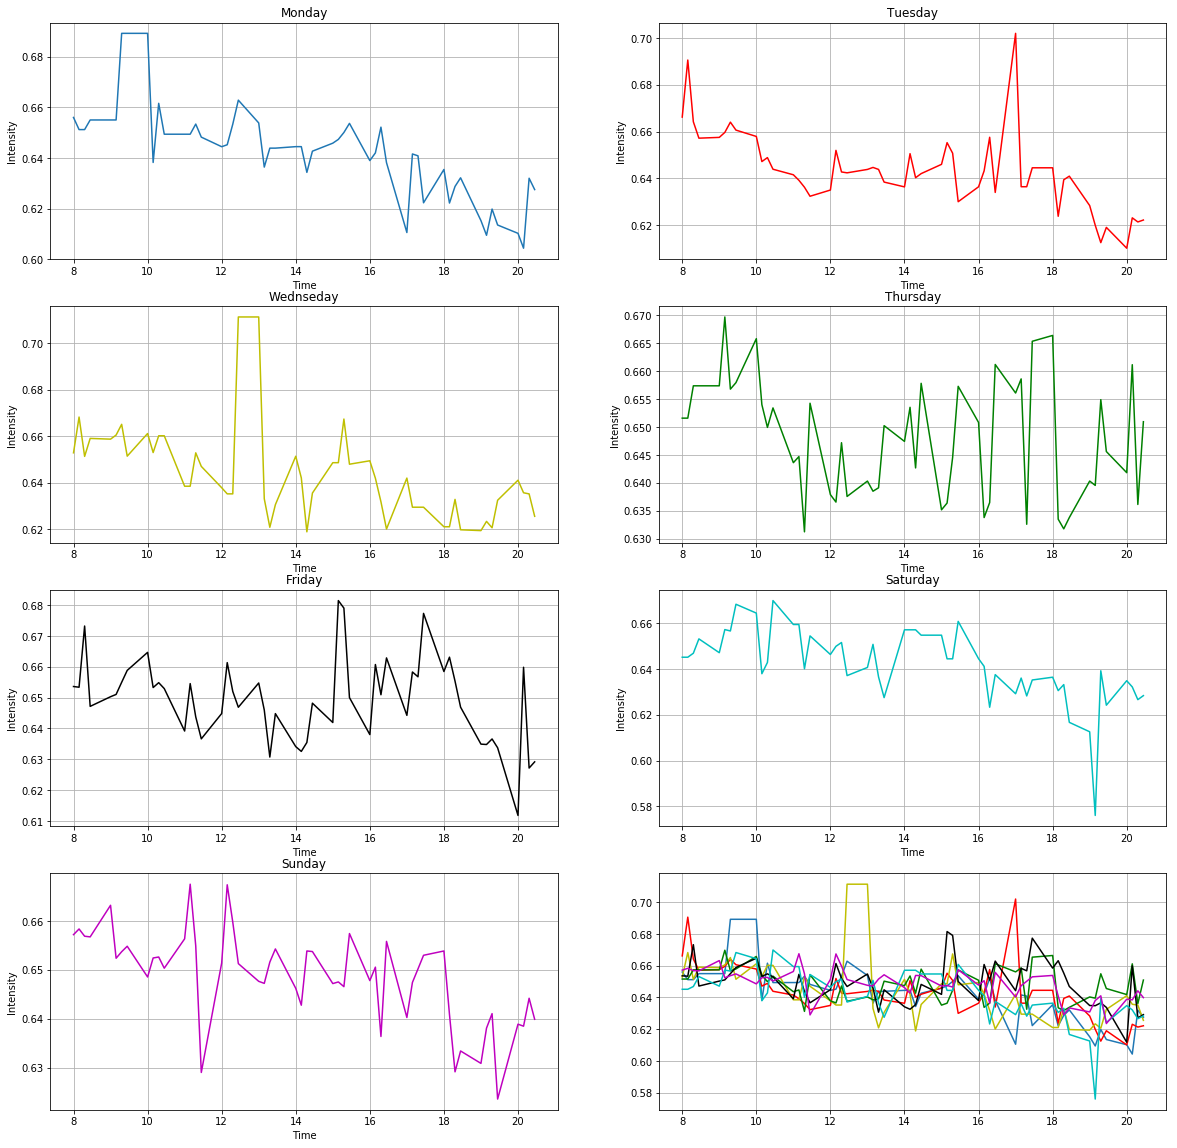

In [544]:
f = plt.figure(figsize=(20,20))

plt.subplot(421)
plt.plot(X, Y1)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Monday")
plt.grid(True)

plt.subplot(422)
plt.plot(X, Y2, "r")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Tuesday")
plt.grid(True)

plt.subplot(423)
plt.plot(X, Y3, "y")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Wednseday")
plt.grid(True)

plt.subplot(424)
plt.plot(X, Y4, "g")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Thursday")
plt.grid(True)

plt.subplot(425)
plt.plot(X, Y5, "k")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Friday")
plt.grid(True)

plt.subplot(426)
plt.plot(X, Y6, "c")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Saturday")
plt.grid(True)

plt.subplot(427)
plt.plot(X, Y7, "m")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Sunday")
plt.grid(True)

plt.subplot(428)
plt.plot(X, Y1, X, Y2,"r", X, Y3, "y", X, Y4, "g", X, Y5, "k", X, Y6, "c", X, Y7, "m")
plt.grid(True)

plt.tick_params(axis='both', which='major', labelsize=10)
f.savefig("day_of_week_intensities_hebbal.png")

In [545]:
days_intensities = plot_data[1:]

avg_intensities = []
for day_intensities in days_intensities:
    avg_intensity = np.average([float(day_intensity) for day_intensity  in day_intensities.split("\t")])
    avg_intensities.append(avg_intensity)

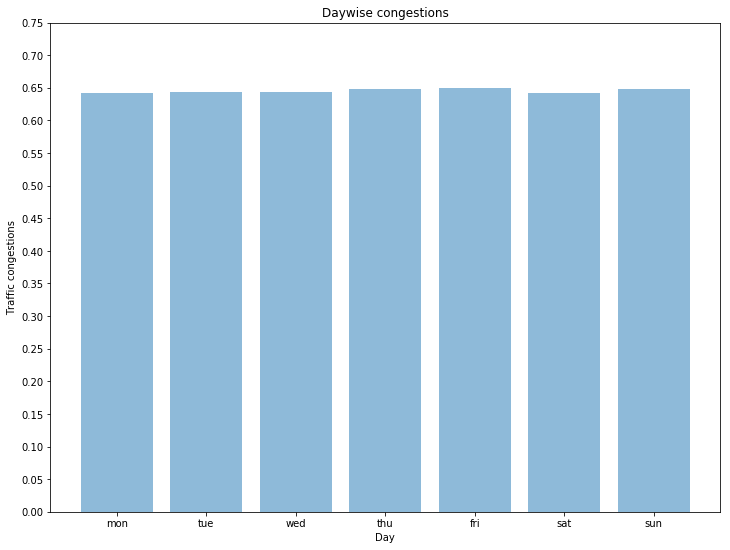

In [546]:
f = plt.figure(figsize=(12,9))
y_pos = np.arange(len(avg_intensities))

plt.bar(y_pos, avg_intensities, align='center', alpha=0.5)
plt.xticks(y_pos, ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
plt.yticks(np.arange(0.0, 0.8, step=0.05))
plt.ylabel('Traffic congestions')
plt.xlabel("Day")
plt.title('Daywise congestions')
f.savefig("day_wise_intensities_hebbal.png")
plt.show()

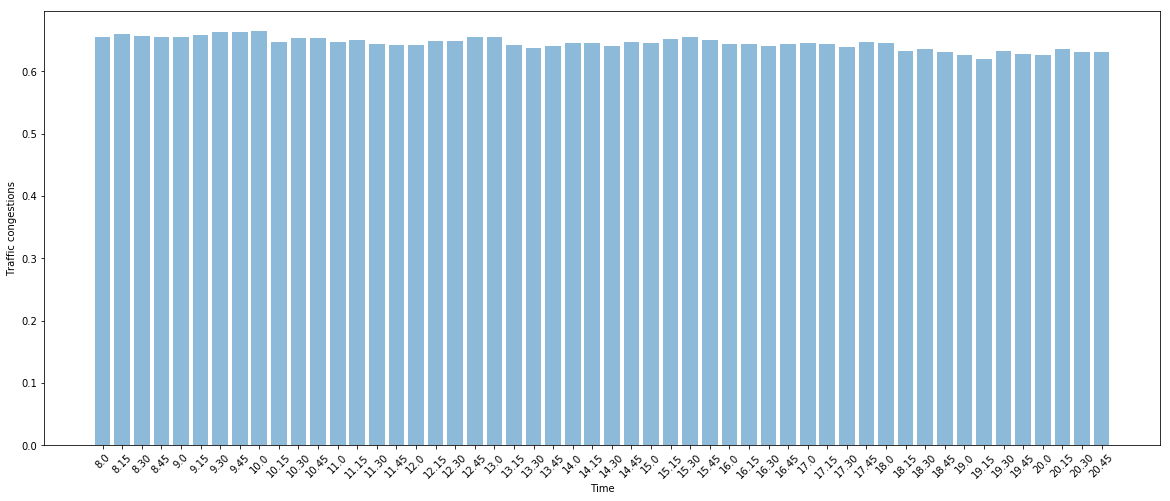

In [547]:
plot_data = pd.read_csv("day_wise_intensities_thilak.tsv", delimiter="\t")

time_points = []
avg_intensities = []

for col in plot_data.columns: 
    avgs = np.average(plot_data[col])
    time_points.append(col)
    avg_intensities.append(avgs)

f = plt.figure(figsize=(20,8))
y_pos = np.arange(len(avg_intensities))
plt.bar(y_pos, avg_intensities, align='center', alpha=0.5)
plt.xticks(y_pos, time_points, rotation=45)
plt.ylabel('Traffic congestions')
plt.xlabel("Time")
f.savefig("hour_wise_intensities_hebbal.png")
plt.show()

# Image Difference code

In [326]:
import cv2

In [328]:
img1 = cv2.imread("/Users/reverie-pc/data/traffic/sushmitha/grouped_processed/1/1520066398_48.png")
img2 = cv2.imread("/Users/reverie-pc/data/traffic/sushmitha/grouped_processed/1/1520067298_22.png")

In [330]:
print(img1.shape)
print(img2.shape)

(300, 400, 3)
(300, 400, 3)


In [462]:
new_img = []
for row in range(len(img1)):
    new_row = []
    for col in range(len(img1[row])):
        if "_".join([str(pixel) for pixel in img1[row][col]]) != "_".join([str(pixel) for pixel in img2[row][col]]):
            new_row.append(np.zeros(3))
        else:
            new_row.append(img2[row][col])
    new_img.append(new_row)
# print(new_img)
cv2.imwrite("diff_image.png", np.array(new_img))

True

In [463]:
X = data[['day_of_week', 'hour', 'minute']]
X = np.array(X)
Y = np.array(data['intensity'])

In [464]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor 
from sklearn.linear_model import BayesianRidge, LinearRegression, SGDRegressor, Lasso

In [465]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=4)

In [466]:
svm = SVR(kernel='linear', C=1.0).fit(X_train, y_train)
print(np.average(np.abs(svm.predict(X_test) - y_test)))

0.039199577172429806


In [467]:
clf = DecisionTreeRegressor().fit(X_train, y_train)
print(np.average(np.abs(clf.predict(X_test) - y_test)))

0.013867335435179791


In [468]:
clf = RandomForestRegressor().fit(X_train, y_train)
print(np.average(np.abs(clf.predict(X_test) - y_test)))

0.013227770685060012


In [469]:
nb = BayesianRidge().fit(X_train, y_train)
print(np.average(np.abs(nb.predict(X_test) - y_test)))

0.013554520518780503


In [470]:
lr = LinearRegression().fit(X_train, y_train)
print(np.average(np.abs(lr.predict(X_test) - y_test)))

0.013553344104335709


In [471]:
sgd = SGDRegressor().fit(X_train, y_train)
print(np.average(np.abs(sgd.predict(X_test) - y_test)))

244569612.15213284


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [472]:
ls = Lasso().fit(X_train, y_train)
print(np.average(np.abs(ls.predict(X_test) - y_test)))

0.015546847905546227


In [473]:
svm = SVR(kernel='rbf', C=1.0).fit(X_train, y_train)
print(np.average(np.abs(svm.predict(X_test) - y_test)))

0.02528559498929766


In [474]:
ad = AdaBoostRegressor().fit(X_train, y_train)
print(np.average(np.abs(ad.predict(X_test) - y_test)))

0.012969200930651993


In [475]:
br = BaggingRegressor().fit(X_train, y_train)
print(np.average(np.abs(br.predict(X_test) - y_test)))

0.013387442795656538


In [476]:
et = ExtraTreesRegressor().fit(X_train, y_train)
print(np.average(np.abs(et.predict(X_test) - y_test)))

0.01359590887760757


In [477]:
gb = GradientBoostingRegressor().fit(X_train, y_train)
print(np.average(np.abs(gb.predict(X_test) - y_test)))

0.012063449210927933


In [478]:
en = ElasticNet(random_state=0).fit(X_train, y_train)
print(np.average(np.abs(en.predict(X_test) - y_test)))

0.015546847905546227


In [479]:
print(gb.predict([[0, 17, 17]]))

[0.63891838]
